In [1]:
import os
import pandas as pd
import numpy as np

In [5]:
#Set the working directory
import os

In [6]:
print(os.getcwd())

C:\Users\Mahesh


In [7]:
# reading data into dataframe
bike_data = pd.read_csv("day.csv", encoding = 'ISO - 8859 -1')

In [8]:
bike_data.shape

(731, 16)

In [9]:
#Check for missing value
bike_data.isnull().sum()

#The data set does not contain any missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
#Convert into category
for col in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
        bike_data[col] = bike_data[col].astype('object')

    

In [13]:
#Convert into Numericals

for col in ['instant','temp','atemp','hum','windspeed','casual','registered','cnt']:
        bike_data[col] = bike_data[col].astype('float')

In [14]:
from datetime import datetime

In [15]:
bike_data['dteday'].apply(str)

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
726    2012-12-27
727    2012-12-28
728    2012-12-29
729    2012-12-30
730    2012-12-31
Name: dteday, Length: 731, dtype: object

In [16]:
#Convetr the Date variable

#bike_data['dteday'] = bike_data['dteday'].astype('Date')

bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])

In [17]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
#There is no missing value present in the given dataset



Outlier Analysis

In [19]:
cnames = ["instant","temp","atemp","hum","windspeed","casual","registered","cnt"]

In [20]:
#Select and Remove the outliers

for i in cnames:
    q75 , q25 = np.percentile(bike_data.loc[:,i],[75,25])
    iqr = q75  -  q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    print(min)
    print(max)
    
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] < min].index)
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] > max].index)

-364.0
1096.0
-0.14041600000000015
1.1329160000000003
-0.06829675000000018
1.0147412500000002
0.20468725
1.0455212500000002
-0.012431000000000025
0.380585
-885.0
2323.0
-840.0
8018.0
-788.125
9500.875


In [21]:
print(min)

-788.125


In [22]:
print(max)

9500.875


In [23]:
bike_data.shape

(676, 16)

In [24]:
#731-676

#55 observations got deleted

Feature Selection

In [25]:
corr_plot = bike_data.loc[:,cnames]
corr_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 730
Data columns (total 8 columns):
instant       676 non-null float64
temp          676 non-null float64
atemp         676 non-null float64
hum           676 non-null float64
windspeed     676 non-null float64
casual        676 non-null float64
registered    676 non-null float64
cnt           676 non-null float64
dtypes: float64(8)
memory usage: 47.5 KB


In [26]:
import seaborn as sns

In [27]:
%matplotlib inline

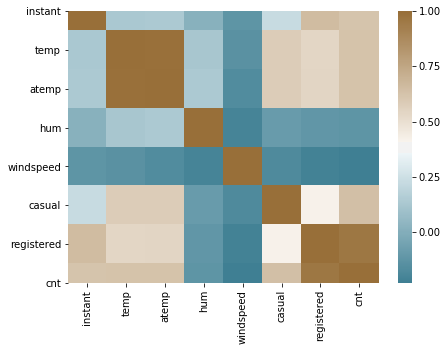

In [28]:

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,5))

#Generate Correlation Matrix

corr = corr_plot.corr()

#plot using seaborn library


sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 50, as_cmap=True),square=True, ax=ax)

In [29]:
#temp and atemp can be observed as they are highly correlated
#Thus we need to drop one of them
#Temp is the actual temperature whereas atemp is the feeling value of temperature
#Feeling temperature is more impprtant when it comes to real life


#Also casual, registered and cnt are positively correlated
#Moreover sum of casual and registered forms cnt variable


In [30]:
#get variable names 
bike_data.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'], dtype=object)

In [31]:
bike_data = bike_data.drop(["instant","casual","registered","temp","dteday"],axis = 1)

In [32]:
bike_data.columns.values

array(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'], dtype=object)

In [33]:
#Till here, our features are selected and they are already normalized.
# We don't need to perform feature scaling
bike_data.to_csv("Clean_bike_data_python.csv",sep="\t")

Regression Model Development

In [34]:
#__ Decision Tree Model ________

In [35]:
from random import randrange, uniform

In [36]:
import sklearn

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
#Divide the data into two part for training the model and testing the model

x = bike_data.values[:, 0:10]
y = bike_data.values[:,10]
y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)

In [43]:
from sklearn import tree

In [44]:
import numpy as np

In [47]:
c50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

In [48]:
#predict new test cases
C50_Predictions = C50_model.predict(x_test)

NameError: name 'C50_model' is not defined